##Logistic Regression

**Problem Statement:**

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides.

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Data Description
# Variable	                              Definition
# ID	                                    UniqueID
# Estimated_Insects_Count	                Estimated insects count per square meter
# Crop_Type	                              Category of Crop(0,1)
# Soil_Type	                              Category of Soil (0,1)
# Pesticide_Use_Category	                Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
# Number_Doses_Week	                      Number of doses per week
# Number_Weeks_Used	                      Number of weeks used
# Number_Weeks_Quit	                      Number of weeks quit
# Season	                                Season Category (1,2,3)
# Crop_Damage	                            Crop Damage Category (0=alive, 1=Damage due to Pesticides)

In [ ]:
#Read the dataset
#show first 5 rows of dataset
#similarly we can use TAIL for last 5 rows 
df=pd.read_csv('/content/sample_data/crop_damage.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
#shape of our dataset i.e gives the no of rows and features in our dataset
df.shape
#we have 88858 rows and 10 column in our dataset

(88858, 10)

In [ ]:
#Numerical description
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.164532
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.370760
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,1.000000


df.describe() ->It will give some statistical insightes from data

In [ ]:
#let's check the data type of every feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
#checking for Null values
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

**Missing data** is a common problem in practical data analysis. They are simply observations that we intend to make but did not. In datasets, missing values could be represented as ‘?’, ‘nan’, ’N/A’, blank cell, or sometimes ‘-999’, ’inf’, ‘-inf’.
find below link for better understanding of missing value imputation.

[***working with missing data***](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)

In [ ]:
df.dropna(inplace=True)  #removed null value rows

In [ ]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Exploratory Data Analysis

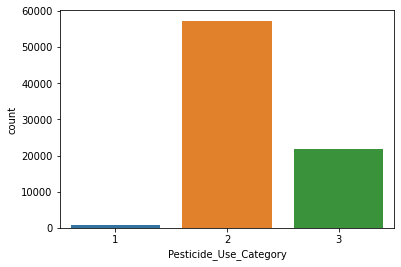

In [ ]:
sn.countplot(x='Pesticide_Use_Category',data=df)

* Countplot can be thought of as histogram across a categorical variables

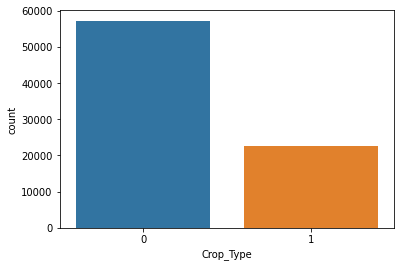

In [ ]:
def cat_plot(col):
  sn.countplot(x=col,data=df)

cat_plot('Crop_Type')  

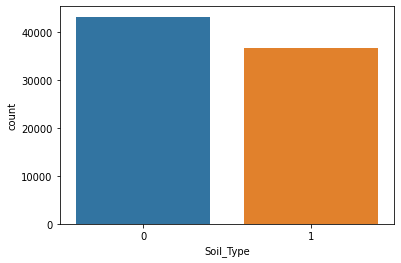

In [ ]:
cat_plot('Soil_Type')

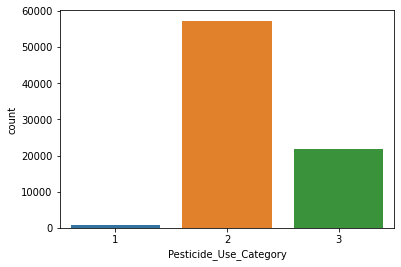

In [ ]:
cat_plot('Pesticide_Use_Category')

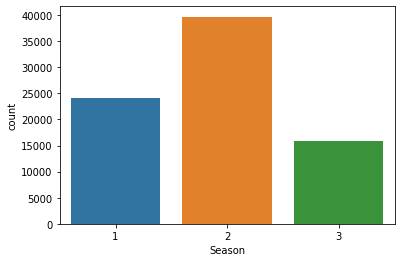

In [ ]:
cat_plot('Season')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


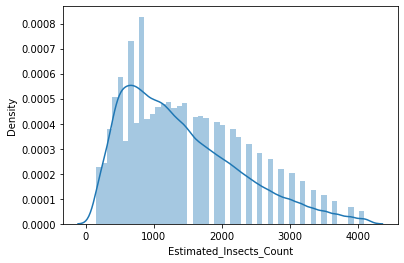

In [ ]:
#Numerical Features 
sn.distplot(df['Estimated_Insects_Count'])
plt.show()

 Techniques for distribution visualization can provide quick answers to many important questions. 

What range do the observations cover? 

What is their central tendency? 

Are they heavily skewed in one direction? 

Is there evidence for bimodality? 
Are there significant outliers?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


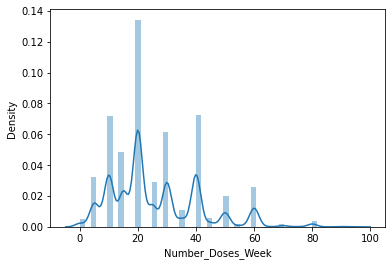

In [ ]:
sn.distplot(df['Number_Doses_Week'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


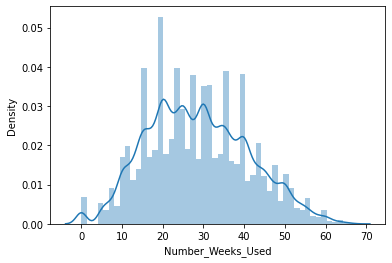

In [ ]:
sn.distplot(df['Number_Weeks_Used'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


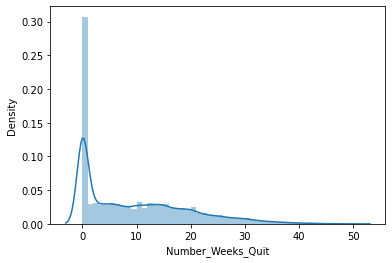

In [ ]:
sn.distplot(df['Number_Weeks_Quit'])
plt.show()

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range

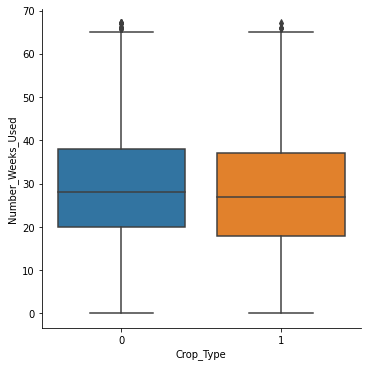

In [ ]:
sn.catplot(x='Crop_Type', y='Number_Weeks_Used',kind = 'box', data = df)

In [ ]:
sn.catplot(x='Soil_Type', y='Number_Weeks_Used',kind = 'box', data = df)

In [ ]:
sn.catplot(x='Crop_Type', y='Number_Doses_Week',kind = 'box', data = df)

In [ ]:
sn.catplot(x='Crop_Type', y='Number_Weeks_Quit',kind = 'box', data = df)

# Data Preprocessing

In [ ]:
df.drop(['ID'],axis=1,inplace=True)
df.head() #Drop the ID column which is unique

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
df1=df.copy()

In [ ]:
#split the data for training and testing purpose
X=df.drop(['Crop_Damage'],axis=1)  #independent features
y=df['Crop_Damage']  #Target Variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print('dataset for training purpose has {} records'.format(X_train.shape[0]))
print('dataset for testing purpose has {} records'.format(X_test.shape[0]))

dataset for training purpose has 59893 records
dataset for testing purpose has 19965 records


Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

you can refer below link for clear understanding.

[*Feature Scaling for Machine Learning*](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

**StandardScaler** removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values as shown in the left figure below. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of households.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

**MinMaxScaler** rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


* Why and when we need to do feature scaling in our dataset

 Machine learning algorithms which required Gradient descent as optimization(error minimization) technique required data to be scaled.
 Having features on a similar scale can help the gradient descent converge more  quickly towards the minima.

# Model Building

## **1.Logistic Regression**

**Logistic regression** establishes the relationship between a categorical variable and one or more independent variables. 

 key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.
 

**Linear regression** doesn’t give a good fit line for the problems having only two values(being shown in the figure), It will give less accuracy while prediction because it will fail to cover the datasets, being linear in nature.

For the **best fit of categorical datasets**, a Curve is being required which is being possible with the help of **Logistic Regression**, as it uses a **Sigmoid function** to make predictions

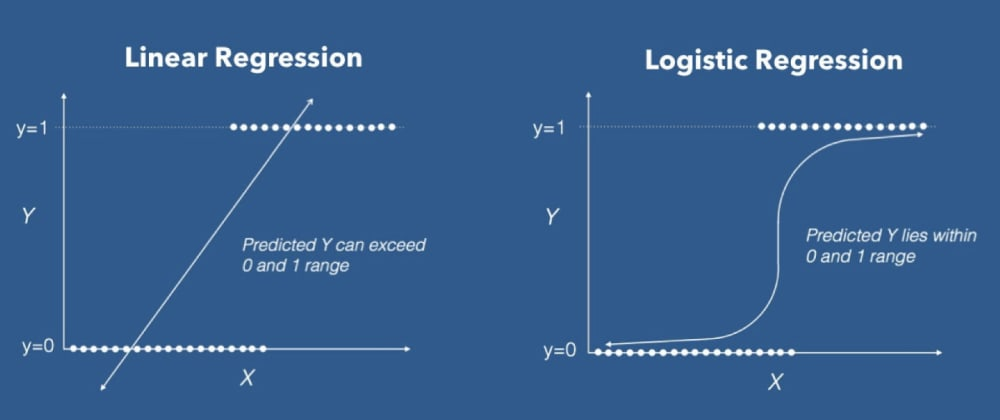

The main reason behind bending of the Logistic Regression  curve  is because of being calculated using a Sigmoid Function (also known as Logistic Function because being used in logistic regression) being given below

Mathematics Involved in Logistic Regression

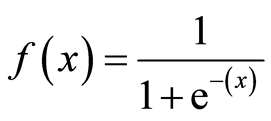

Link you can follow for clear understanding

[*Introduction to logistic regression*](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)

[*sklearn logistic regression*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled,y_train)

y_pred=logreg.predict(X_test_scaled)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16381,   337],
       [ 2998,   249]])

* A confusion matrix is a table that is often used to describe the performance of a classification model 

[Performance metrics in classification](https://www.youtube.com/watch?v=aWAnNHXIKww)

 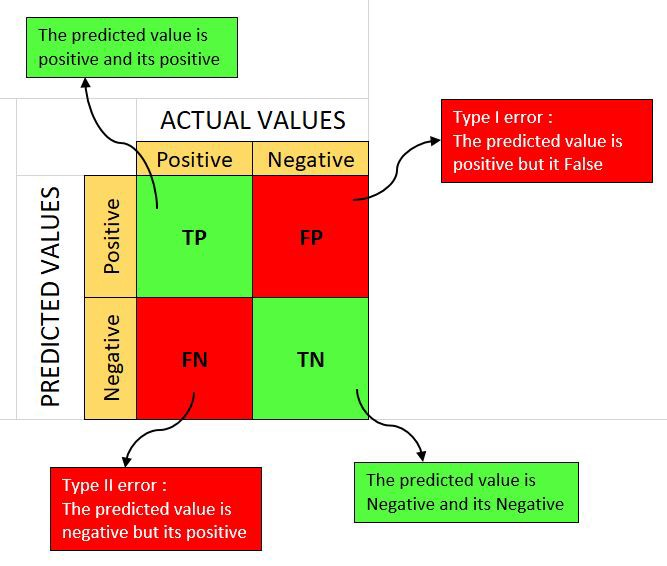

Model evaluation using Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

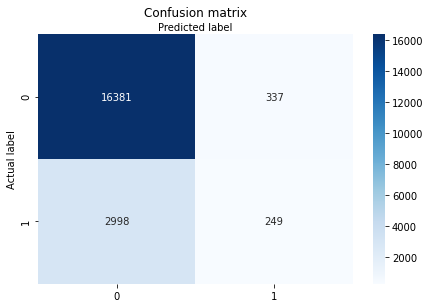

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap='Blues',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Evaluation Metrices

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8329576759328825
Precision: 0.4249146757679181
Recall: 0.07668617185093933


* Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.
* recall is calculated as the number of true positives divided by the total number of true positives and false negatives

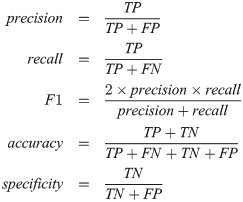

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.  
It works for only binary classification problems

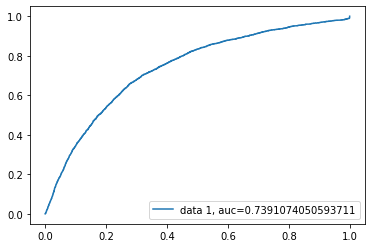

In [ ]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Prediction on new data

prediction=(logreg.predict(scaler.fit_transform([[400,1,0,1,0,0,0,2]])))
if prediction==0:
  print('crop is alive')

else:
  print('crop is damaged due to pesticide')  

crop is alive
